### Метод Шапиро-Уилка

Метод Шапиро-Уилка позволяет проверить распределние на нормальность. Далеко не всегда можно на прямую работать с метрикой которую хотим вырастить. Это связано со статистическими тестами большая часть из которых требует, чтобы метрика была распределена нормально. Проверить это можно не только на глаз (когда график похож на колоко), но и например с помощью метода Шапиро-Уилка

Здесь в качестве нулевой гипотезы (H0) - распределение является нормальным, а альтернативная гипотеза (H1) - выборка пренадлежит другому распределению.

Дальше работает так же как и с другими статистическими тестами.

#### Генерируем данные из нужного распределения

In [2]:
from numpy.random import rand
from scipy.stats import shapiro
from matplotlib import pyplot

Matplotlib is building the font cache; this may take a moment.


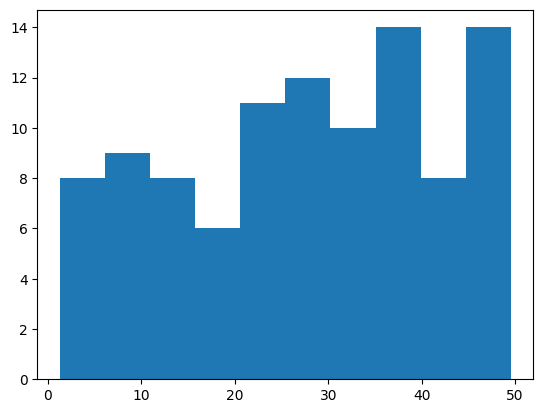

In [3]:
df = rand(100) * 50
pyplot.hist(df)
pyplot.show()

#### Проверяем распределение на нормальность

Воспользуемся функцией shapiro из scipy.stats которая вернет статистику Шапиро-Уилка и p-value.

In [4]:
# Применяем метот Шапиро-Уилка:
stat, p_val = shapiro(df)
print(p_val)

# Задаем уровень значимости в 5%
a = 0.05

# Проверяем распределение на нормальность
if p_val > a:
    print('Fail to reject H0, distribution is normal')
else:
    print('Reject H0, distribution is not normal')

0.0017117939749570958
Reject H0, distribution is not normal


### Логарифмирование

#### Генерируем данные из логнормального распределения

In [5]:
import numpy as np
df = np.random.lognormal(5,1,1000)

Здесь мы создаем 1000 случайных из логормального распределения с матожиданием равным 5 и дисперсией равной 1. Вывод будет выглядить так:

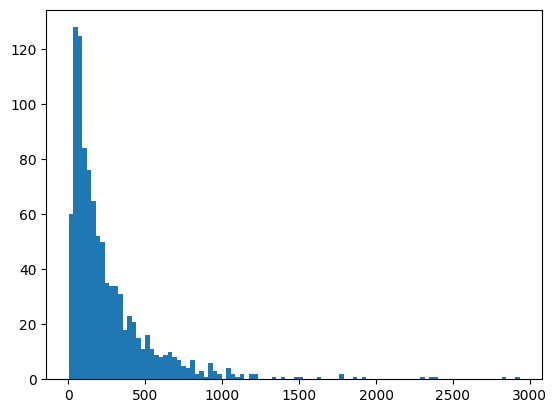

In [6]:
pyplot.hist(df, bins=100)
pyplot.show()

#### Применяем логарифмирование

Предположим что это мы увидели, построив распределение срденего чека в нашем сервисе. Мы можем сразу логарифмировать метрику и проверять гипотезы на уже трансформированных значениях.

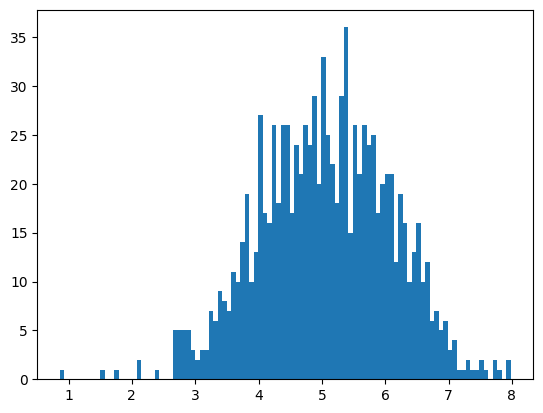

In [7]:
new_df = [np.log(x) for x in df]
pyplot.hist(new_df, bins=100)
pyplot.show()

Это уже похоже на нормальное распределение.

#### Проверям распределение на нормальность

воспользуемся критерием Шапиро-Уилка, чтобы проверить его нормальность.

In [8]:
stat, p_val = shapiro(new_df)
print(f'stat={stat}, p-value={p_val}')

stat=0.9971240694752256, p-value=0.07016739398134944


In [9]:
p_val > a

True

p-value больше 5, а это значит что распределение скорее всего нормальное.

###  Метод Бокса-Кокса

Метод Бокса-Кокса так же является методом привести распределение к нормальному.

Для простоты рассмотрим работу метода на предыдущем примере с логарифмированием. Генерирование исходных данных оставим таким же, по этому начнем сразу с преобразования:

In [10]:
# импортируем функцию boxcox из модуля scipy.stats
from scipy.stats import boxcox

Применяем метод Бокса-Кокса, здесь в переменной new_df у нас окажутся трансформированные данные, а в переменной fitted_lambda - оптимальное значение лямбда для восстановления исходных значений.

In [11]:
new_df, fitted_lambda = boxcox(df)

Наше новый распределение будет выглядить так:

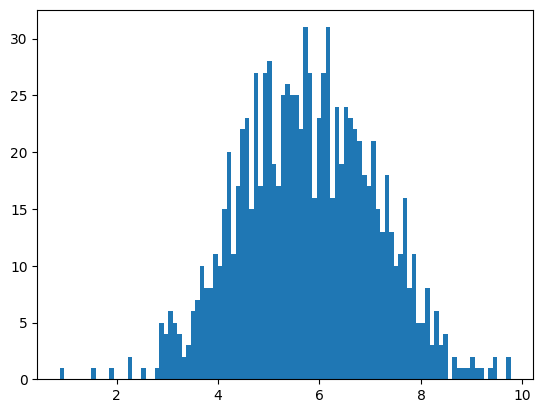

In [12]:
pyplot.hist(new_df, bins=100)
pyplot.show()

Проверяем распределение на нормальность

Распределение похоже на нормальное! Давайте убедимся в этом:

In [13]:
stat, p_val = shapiro(new_df)
print(f'stat={stat}, p-value={p_val}')

stat=0.9983595693127858, p-value=0.466432410809763


P-Value имеет значение 0.76. В данном случае критерий Шапиро-Уилка даже больше уверен в нормальности распределения, чем логарифм.